In [ ]:
!pip install tweepy
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import re
import tweepy
import matplotlib.pyplot as plt
import numpy as np
from tweepy import OAuthHandler
from textblob import TextBlob

Positive tweets percentage: 35.9375 %
Negative tweets percentage: 4.6875 %
Neutral tweets percentage: 59.375 %         


Positive tweets:
RT @Academics_Team2: Hello, kindly send us details of your assignments and be rest assured of good grades
#ESSAYS 
#HW 
#DataScience   
#MA…
RT @Femisonic: Hey Devs Take Survey &amp; Win A Macbook 
https://t.co/RLKrSgjmK0

#Programming
#NFTs
#cybersecurity #MachineLearning #100DaysOf…
RT @ravinderram4: My first pwa app is testing. It is served by genie in digitalocean. Tmorrow I'll upload its first video and talk about it…
RT @TheActual_News: #Bungie is globally trending!
Bungie, the studio responsible for the creation of Halo and Destiny, two of the gaming wo…
RT @glitchbotio: "Your very silence shows you agree."- Euripides #softwareengineer #javascript #python #C++ #golang #nodejs #reactjs #stock…
RT @pypackages: The release of identify package 2.4.7 is now available. 🥳

File identification library for Python
https://t.co/16JeuWi3Iu…
RT @MIT_CSAIL

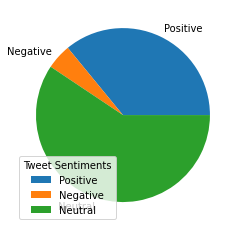

In [ ]:
positive = 0;
negative = 0;
neutral = 0;

class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'XXXXXXXXXX'
        consumer_secret = 'XXXXXXXXXX'
        access_token = 'XXXXXXXXXX'
        access_token_secret = 'XXXXXXXXXX'
  
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
  
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
  
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
  
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
  
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
  
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
  
            # return parsed tweets
            return tweets
  
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
  
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'Python', count = 200)
  
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    positive = 100*len(ptweets)/len(tweets)
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    negative = 100*len(ntweets)/len(tweets)
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
    neutral = 100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])

    y = np.array([positive, negative, neutral])
    labelsForGraph = ['Positive', 'Negative', 'Neutral']
    plt.pie(y, labels=labelsForGraph)
    plt.legend(title = "Tweet Sentiments")
    plt.show()
  
if __name__ == "__main__":
    # calling main function
    main()
